# Introduction

Glaciers are melting, sea levels are rising, cloud forests are dying, and wildlife is scrambling to keep pace. It has become clear that humans have caused most of the past century's warming by releasing heat-trapping gases as we power our modern lives. Called greenhouse gases, their levels are higher now than at any time in the last 800,000 years.

We often call the result global warming, but it is causing a set of changes to the Earth's climate, or long-term weather patterns, that varies from place to place. While many people think of global warming and climate change as synonyms, scientists use “climate change” when describing the complex shifts now affecting our planet’s weather and climate systems—in part because some areas actually get cooler in the short term.

Climate change encompasses not only rising average temperatures but also extreme weather events, shifting wildlife populations and habitats, rising seas, and a range of other impacts. All of those changes are emerging as humans continue to add heat-trapping greenhouse gases to the atmosphere, changing the rhythms of climate that all living things have come to rely on.

# Purpose
I will be analysing the changes that have been taking place with respect to temperature all around the world. 
My attempt is to understand the trends and patterns behind the rise in temperature and to eventually build a predictive model which can predict the temperature.

# NOTE
I have taken attributes like Monthly Average Temperatures on the basis of countries and cities. I have made these attributes out of data till year 2018 and have copied the same in the attributes of test dataset which includes data after 2018, hence it will not depend on the test dataset target variable.

# Tasks
### 1. Exploratory Data Analysis and Data Pre-processing
### 2. Model Building and evaluation

In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/daily-temperature-of-major-cities/city_temperature.csv


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('/kaggle/input/daily-temperature-of-major-cities/city_temperature.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploratory Data Analysis and Data-Preprocessing

In [4]:
dataset.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [5]:
dataset.isnull().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

So the feature state has a lot of null values. Rest of the features don't seem to have any null values.

In [6]:
dataset.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [7]:
dataset = dataset.drop('State', axis=1)

* We have removed the State variable because it was having more than 50% null values. Also the feature wasn't appearing much useful.
* Now, we will try some visualisations to better understand the data.

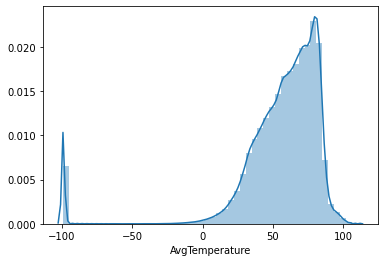

In [8]:
sns.distplot(dataset['AvgTemperature'])

Average Temperature variable is left skewed.

In [9]:
dataset['AvgTemperature']= (dataset.AvgTemperature-32)*5/9

Changing temperature from Farenheit to Celsius

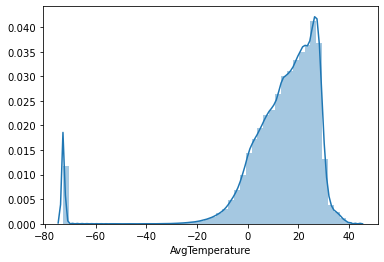

In [10]:
sns.distplot(dataset['AvgTemperature'])

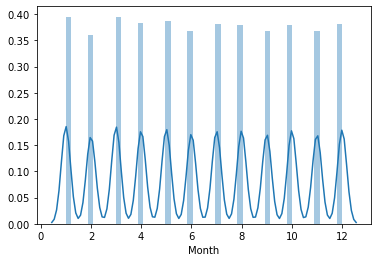

In [11]:
sns.distplot(dataset['Month'])

 This means that all the months have almost equal number of entries.

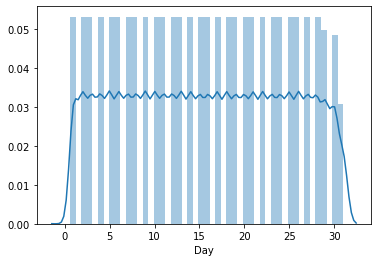

In [12]:
sns.distplot(dataset['Day'])

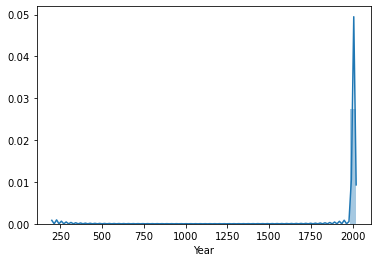

In [13]:
sns.distplot(dataset['Year'])

This shows that we may be having some outliers as the years are heavly left skewed.

Let's study the 'Year' attribute

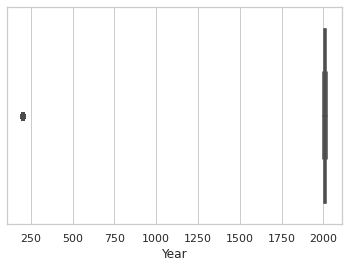

In [14]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset['Year'])

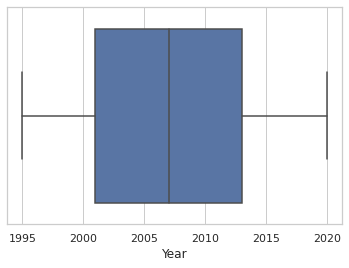

In [15]:
dataset=dataset[dataset['Year']>1990]
sns.boxplot(x=dataset['Year'])

 Now it looks much better. We have removed outliers from the Year feature but we have to update the dataset.

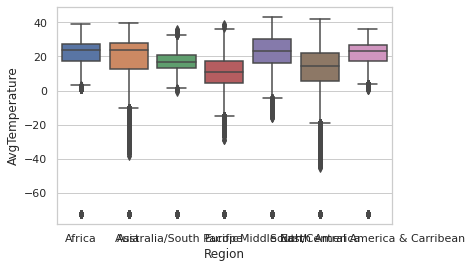

In [16]:
sns.boxplot(x=dataset['Region'], y=dataset['AvgTemperature'], data=dataset)

We have so many outliers in region feature. We will let our model treat them.

[Text(0, 0, 'Africa'),
 Text(0, 0, 'Asia'),
 Text(0, 0, 'Australia/South Pacific'),
 Text(0, 0, 'Europe'),
 Text(0, 0, 'Middle East'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'South/Central America & Carribean')]

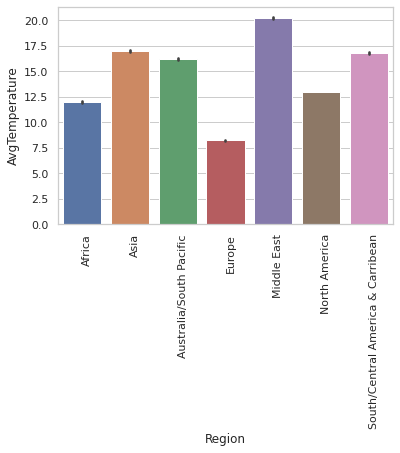

In [17]:
sns.set(style="whitegrid")

chart = sns.barplot(x=dataset['Region'], y=dataset['AvgTemperature'],data=dataset)
chart.set_xticklabels(labels=chart.get_xticklabels(),rotation=90, horizontalalignment='left')


Middle east seems to be having the highest average temperature while Europe is having the lowest

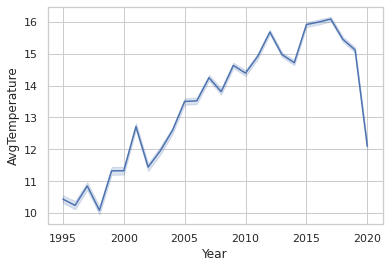

In [18]:
ax = sns.lineplot(x=dataset['Year'], y=dataset['AvgTemperature'], data=dataset)

Trends are showing that Average temperature has sharply decreased roughly after 2017. This is because major land area lies in the Northern Hemisphere and presently only the initial months of the year 2020 have been recorded. It is affecting the overall trend.

In [19]:
dataset2 = dataset[dataset.Year<2020]

We have removed the entries with the year 2020 because the data for 2020 was incomplete was affecting the overall trend. It would have affected the performance of our model.

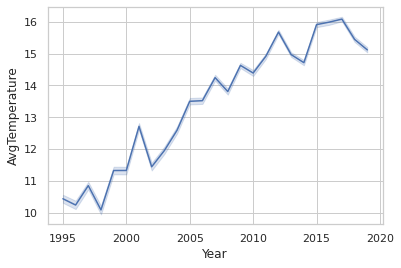

In [20]:
ax = sns.lineplot(x=dataset2['Year'], y=dataset2['AvgTemperature'], data=dataset2)

Now it looks much better. The sharp decrease of the Global average temperature has been removed.

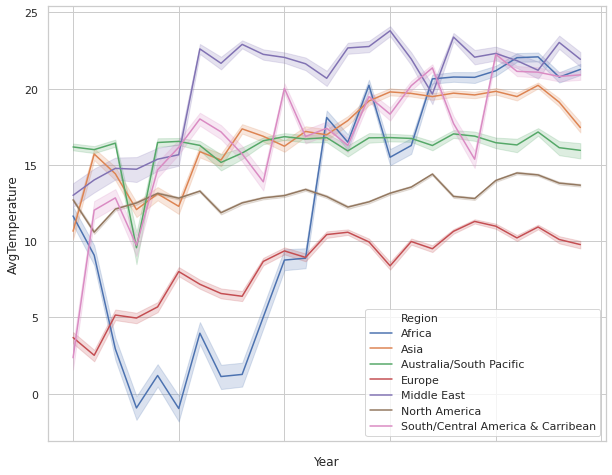

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
region = dataset['Region']
chart = sns.lineplot(x=dataset2['Year'], y=dataset2["AvgTemperature"], hue=region, legend="full",
                  data=dataset2)
chart.set_xticklabels(labels=chart.get_xticklabels(),rotation=90, horizontalalignment='left')
plt.show()

Africa is showing high fluctuations in temperature while North America is having a pretty stable changes over time

In [22]:
dataset['Weather_type']=dataset['AvgTemperature']

Weather type is created for studying temperature distribution globally. It will be dropped before making the final dataset.

In [23]:
temp=[dataset]
for data in temp:
    data.loc[dataset['Weather_type']<=12,'Weather_type']=0,
    data.loc[(dataset['Weather_type']>12) & (dataset['Weather_type']<=18),'Weather_type']=1,
    data.loc[(dataset['Weather_type']>18) & (dataset['Weather_type']<=26),'Weather_type']=2,
    data.loc[(dataset['Weather_type']>26) & (dataset['Weather_type']<=35),'Weather_type']=3,
    data.loc[(dataset['Weather_type']>35),'Weather_type']=4

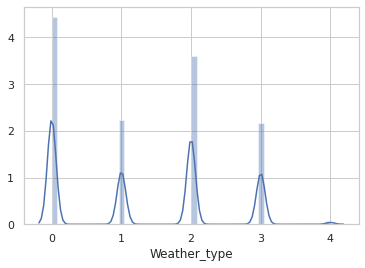

In [24]:
sns.distplot(dataset['Weather_type'])

It appears that very less places have temperatures higher than 35 degree Celsius

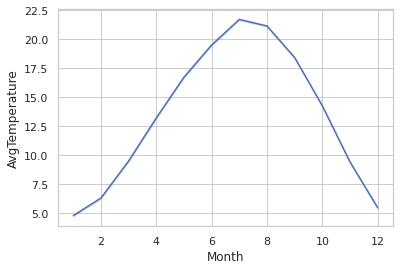

In [25]:

sns.lineplot(x=dataset['Month'], y=dataset['AvgTemperature'], data=dataset)

So the average temperature on global level peaks somewhere between June and August

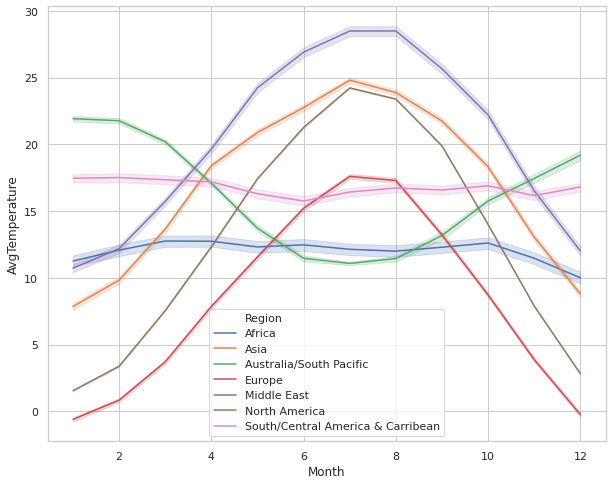

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x=dataset['Month'], y=dataset['AvgTemperature'], hue=dataset['Region'],legend="full", data=dataset)
plt.show()

In [27]:
dataset.drop('Weather_type',axis=1,inplace=True)

## Seperating dataset for test train purposes

In [28]:
train = dataset[dataset.Year<2019]
test = dataset[dataset.Year>=2019]

In [29]:
#function to create new attribute
def attribute(df,col1,col2):
    index_col1=df.columns.get_loc(col1)
    index_col2=df.columns.get_loc(col2)
    for row in range(len(df)):
        f=df.iat[row,index_col1]
        df.iat[row,index_col2]=f

#calculating monthly average temperature for each city
g=train.groupby(['City','Month'])
df=g.mean()
df['AvgTemperature_City_Monthly']=0.0
attribute(df,'AvgTemperature','AvgTemperature_City_Monthly')
drop=['Year','Day', 'AvgTemperature']
df.drop(drop,axis=1,inplace=True)
on=['City','Month']
train=pd.merge(train,df,on=on,how='inner')
test=pd.merge(test,df,on=on,how='inner')


#calculating monthly average temperature for each country
g=train.groupby(['Country','Month'])
df=g.mean()
df['AvgTemperature_Country_Monthly']=0.0
attribute(df,'AvgTemperature','AvgTemperature_Country_Monthly')
drop=['Year','Day', 'AvgTemperature'
     ,'AvgTemperature_City_Monthly']
df.drop(drop,axis=1,inplace=True)
on=['Country','Month']
train=pd.merge(train,df,on=on,how='inner')
test=pd.merge(test,df,on=on,how='inner')

## Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def encode(df):
    df['City'] = le.fit_transform(df['City'])
    df['Region'] = le.fit_transform(df['Region'])
    df['Country'] = le.fit_transform(df['Country'])
    
encode(train)
encode(test)

## Checking correlation

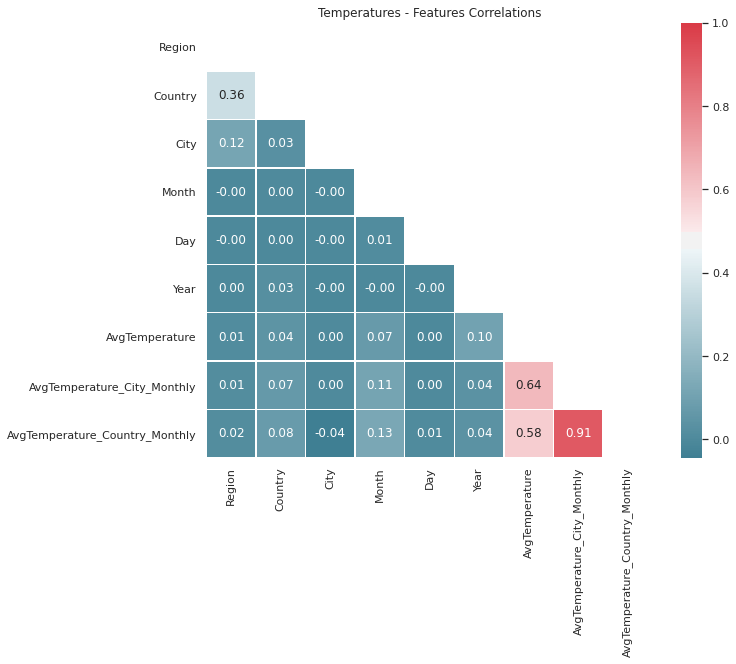

In [31]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.title('Temperatures - Features Correlations')
plt.show()

# Model Building and evaluation

In [32]:
y_train=train['AvgTemperature']
X_train=train.drop('AvgTemperature',axis=1)

y_test=test['AvgTemperature']
X_test=test.drop('AvgTemperature',axis=1)

## Lasso Regression

In [33]:
from sklearn.linear_model import Lasso
regr = Lasso(alpha=0.01)
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error
mse=np.sqrt(mean_squared_error(y_test,y_pred))

print('Root Mean Squared Error - {}'.format(mse))

Root Mean Squared Error - 11.103585212383784


# Conclusion
Right now, I have used just one model without using GridSearchCV and other parameter tuning. With using and comparing more models, I am sure we can get a better functioning model than the current one.
We can also focus our work to analyse the average temperatures of some particular city or country. These points are left for future work.